# Исследование сервиса для размещения объявлений о недвижимости


### Постановка задачи

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Задача** — научиться определять рыночную стоимость объектов недвижимости. Для этого нужно провести исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


### План исследования

* Предобработка данных
* Построение и анализ гистрограмм для основных значений
* Анализ скорости продажи квартир
* Изучение влияния различных факторов на стоимость квартиры
* Расчет средней цены одного квадратного метра 
* Вычисление средней стоимости каждого километра до центра Санкт-Петербурга
* Выводы и рекомендации

### Импортирование библиотек

In [1]:
# Импортирование библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Игнорировать все предупреждения
warnings.filterwarnings("ignore")

# Зададим стиль для всех графиков
sns.set_style('darkgrid')

### Загрузка данных

In [2]:
# Чтение файла
data = pd.read_csv('/Users/aaleksakhin/Library/CloudStorage/GoogleDrive-aaalexahin@gmail.com/My Drive/Data/Datasets/project_real_estate/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)

# Выведем первые 5 строк датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим общую информацию о датасете с помощью метода `.info()`


In [3]:
# Вызов метода .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датасет состоит из 28 столбцов и 23 696 строк. 

Уже на данном этапе можно сделать предварительный вывод о необходимости предобработки данных, так как:

* Количество непустых значений в столбцах разное, что свидетельствует о наличии пропусков. Нужно понять, с чем связаны эти пропуски и устранить их там, где это возможно;
* Тип данных в некоторых столбцах некорректный. Например, в столбце `first_day_exposition` тип данных `object`, хотя для этого столбца нужно использовать тип данных `datetime`. Тип данных в столбце `is_apartmen` также `object`, хотя логично использовать тип данных `bool`.


Построим гистрограммы по всем числовым столбцам датафрейма для предварительного знакомства с данными:

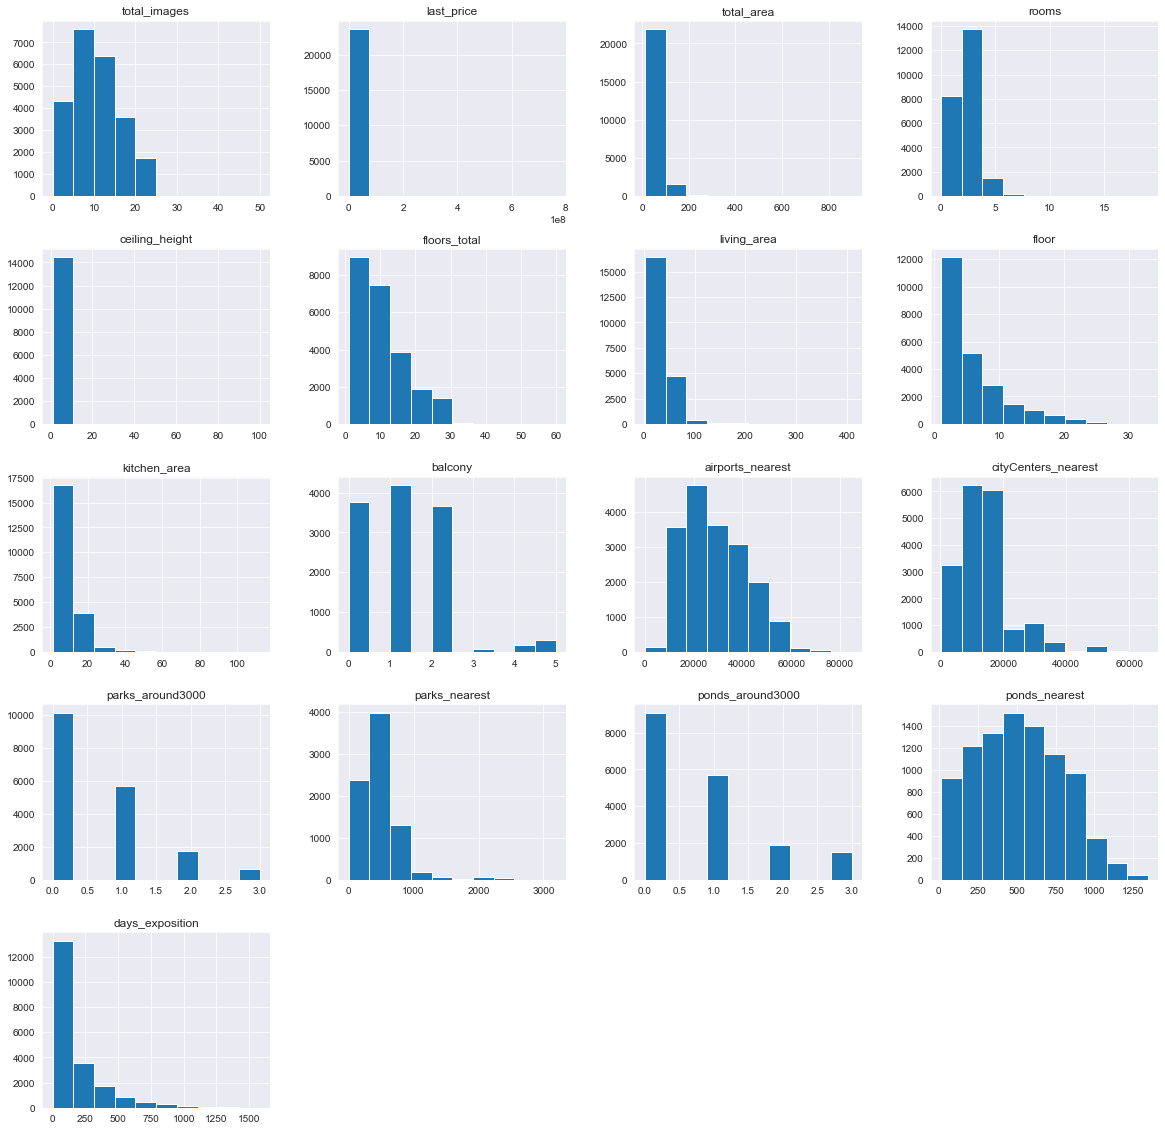

In [4]:
# Построение гистограмм
data.hist(figsize=(20,20));


На основании гистрограмм можно сделать следующие предварительные выводы:
* Чаще всего пользователи размещают в объявлениях от 5 до 10 изображений; 
* Квартиры чаще всего продаются в домах, в которых не более 12 этажей;
* Чаще всего распологаются на 1-5 этажах;
* Как правило, в продаваемых квартирах есть один балкон. Чуть реже встречаются квартиры без балкона или с двумя балконами.
* Большая часть квартир находится на расстоянии 18-25 км от аэропорта, 500-700 метров от парка и около 500 м. от водоема.
* Большинство квартир не имеют ни парка, ни водоема в радиусе 3 км.
* В течение 175 дней продается большая часть квартир. Однако, встречаются объявления, которые размещаются более 1000 дней, то есть более 2,5 лет. Это кажется подозрительным, нужно более внимательно изучить эту аномалию.

По некоторым столбцам сделать какие-то выводы на основании полученых гистрограмм сложно, так как многие значения собираются в первых корзинах гистрограммы из-за наличия выбросов. Такие проблемы есть в столбцах со стоимостью квартиры, площадьми, количеством комнат, с высотой потолков и другими параметрами. Нужно рассмотреть каждую гистрограмму отдельно, изучить выбросы, понять их природу и при необходимости устранить.


### Предобработка данных

#### Обработка пропусков

Для начала посчитаем количество пропущенных значений в каждом столбце датасета с помощью метода `.isna()`

In [5]:
# Применение метода isna()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть во многих столбцах датафрейма. Попробуем предположить, чем они могут быть объяснены и что с ними можно сделать.

Значения в столбцах `ceiling_height`, `floors_total`, `living_area` и `kitchen_area` заполняются пользователями Яндекс.Недвижимости самостоятельно, поэтому пропуски в них могут быть вызваны человеческим фактором. Этим пропуски можно заменить  медианными значениями. При этом для столбцов `living_area` и `kitchen_area` будет логично поставить медианные значения групп, сформированным исходя из количества комнат, так как при прочих равных, чем больше комнат, тем больше площадь всего жилья и отдельных помещений.

У столбца `kitchen_area` есть нюанс - пропуски в этом столбце могут встречаться в студиях, так как в квартирах такого типа нет отдельного помещения для кухни. Проверим эту гипотезу: посчитаем количество студий и количество пропусков в столбце `kitchen_area` в квартирах такого типа. Если два значения совпадут, гипотеза подтвердится.

In [6]:
# Выведем количество квартир-студий
display ('Количество студий: ', data.query('studio == True')['studio'].count())

# Выведем количество пропусков в столбце kitchen_area там, где квартира является студией
(display ('Количество пропусков в столбце kitchen_area:', data.query('studio == True')
          ['kitchen_area'].isna().sum()))

'Количество студий: '

149

'Количество пропусков в столбце kitchen_area:'

149

Гипотеза подтвердилась. Однако, далеко не все пропуски в столбце `kitchen_area` можно объяснить тем, что квартира является студией. Общее количество пропусков в столбце `kitchen_area` намного больше: 2 278. Судя по всему, в остальных случаях пропуски объясняются человеческим фактором. Логичнее всего сделать следующее:

* В тех строках, где квартира является студией, пропуски нужно сохранить, так как они логически обоснованы.
* В случаях, где квартира студией не является, пропуски в столбце `kitchen_area` нужно заменить на медианное значение группы, рассчитанное исходя из количества комнат.


In [7]:
# Напишем цикл, который пройдется по уникальным значениям столбца rooms
for r in data['rooms'].unique():
    # В каждой итерации заменим пропускк в kitchen_area на медианное значение
    data.loc[(data['rooms'] == r) & (data['studio'] == False) & (data['kitchen_area'].isna()),'kitchen_area'] = data.loc[(data['rooms'] == r),'kitchen_area'].median()
    
# Проверим, все ли пропуски kitchen_area в квартирах не-студиях устранены    
data.loc[data['studio'] == False]['kitchen_area'].isna().sum()

59

В датасете осталось 59 пропусков. Посмотрим, с чем это может быть связано: выведем на экран те строки, в которых значение столбца `studio` равно `False` и в которых есть пропуски в столбце `kitchen_area`.

In [8]:
# Посмотрим, в каких строках остались пропуски в столбце kitchen_area
data.loc[(data['studio'] == False) & (data['kitchen_area'].isna())]['rooms'].unique()


array([0])

Во всех строках отфильтрованного датафрема количество комнат равно нулю и во всех таких строках значения `kitchen_area` пропущено. С аномальным значением количества комнат еще продстоит разобраться: пока оставим эти пропуски без изменений.

Теперь проведем следующие замены: 

* пропущенные значения в столбце `living_area` заменим на медианные, посчитанные исходя из количества комнат 
* пропущенные значения в столбцах `ceiling_height` и `floors_total` заменим на медианные без группировки по другим признакам

In [9]:
# Заменим пропуски в столбцах living_area на медианные значения, исходя из количества комнат
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['living_area'].isna()),'living_area'] = data.loc[(data['rooms'] == r),'living_area'].median()
    
# Заменим пропуски в столбцах ceiling_height и floors_total на медианные значения
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['floors_total'].isna(),'floors_total'] = data['floors_total'].median()

Пропуск в столбце `is_apartment` встречается в 88% случаев. Логично предположить, что пропуск означает, что жилой объет не является апартаментами, то есть соответствует значению `False`. Заменим все пропуски в этом столбце на `False`.

In [10]:
# Добавим значениe False вместо пропусков в столбце is_apartment
data.loc[data['is_apartment'].isna(),'is_apartment'] = False

Логично предположить, что пропуски в столбцах `balcony`, `parks_around3000` и `ponds_around3000` скорее всего означают, что в квартире нет балкона, а в радиусе 3 км. от квартиры нет парка или водоема. Заменим все пропуски в этих столбцах на ноль.


In [11]:
# Заменим пропуски в столбцах на ноль
data.loc[data['balcony'].isna(),'balcony'] = 0
data.loc[data['parks_around3000'].isna(),'parks_around3000'] = 0
data.loc[data['ponds_around3000'].isna(),'ponds_around3000'] = 0

Причина пропуска в `locality_name` не очевидна: вероятно, Яндекс не смог определить локацию квартиры. Заменим пустые значения в этом столбце на "Другое".

In [12]:
# Заменим пустые значения в столбце locality_name на "Другое"
data.loc[data['locality_name'].isna(),'locality_name'] = 'Другое'

Пропуски в "картографеских" столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest`   могут быть объяснены технической ошибкой: по какой-то причине не удалось определить расстояние от дома до того или иного объекта. Оставим эти пропуски без изменений. Пропуски в столбце `days_exposition` также оставим без изменений: они могут означать, что объявление еще не закрыто и находится в размещении.

In [13]:
# Убедимся, что пропуски устранены в нужных столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              208
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски устранены во всех столбцах, где это было необходимо, за исключением столбца `kitchen_area`: здесь остались пропуски в студиях и в квартирах, где количество комнат равно нулю.

#### Замена типов данных

С помощью метода `.info()` выше мы обнаружили, что некоторые типы данных требуют пребразования. Для корректного анализа данных нужно выполнить следующие действия:

1. Заменить тип данных в столбце `first_day_exposition` на `datetime`.
2. Заменить тип данных в столбцах `floors_total`, `balcony`, `ponds_around3000`, `parks_around3000`, `days_exposition` на `int`, так как по логике значения в этих столбцах не могут быть дробными.
3. Заменить тип данных в столбцах `is_apartment` на `bool`.

In [14]:
# Заменим тип данных на int там, где это необходимо
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)

# В столбце first_day_exposition преобразуем данные в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

# В столбце is_apartment преобразуем данные в тип bool
data['is_apartment'] = data['is_apartment'].astype(bool)

# Проверим тип данных в столбцах преобразованного датафрема методом .info()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23491 non-null  float64       
 13  balcony         

Изменения в датафрейм успешно внесены во все столбцы, кроме `days_exposition`. Это связано с тем, что в данном столбце есть значение `NaN`. Оставим этот столбец без изменений, тип данных `float` никаких не помешает в дальнейшем.

#### Обработка дубликатов
Теперь проверим, есть ли в датафрейме дубликаты, найденные дубликаты устраним. Для начала проверим датасет на наличие явных дубликатов


In [15]:
# Проверим явные дубликаты
data.duplicated().sum()

0

В датасете явные дубликаты отсутствуют. Теперь проверим датасет на наличие неявных дубликатов - выведем уникальные значения в столбцах с названиями, такой столбец в датасете один: `locality_name`.

In [16]:
# Создадим переменную с уникальными названиями населенных пунктов
unique_names = data['locality_name'].sort_values().unique()

# Выведем список с уникальными населенными пунктами, а также количество населенных пунктов
display (f'Количество уникальных значений: {len(unique_names)}')
display (unique_names)


'Количество уникальных значений: 365'

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Другое', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городс

В датасете присутстуют похожие типы населенных пунктов: `"городской посёлок"`, `"коттеджный поселок"`, `"поселок городского типа"`, `"посёлок городского типа"`, `"посёлок"`. В населенных пунктах с такими названиями могут содержаться неявные дубликаты: например, `"поселок Тельмана"` и `"посёлок Тельмана"`. Заменим все эти значения на единое название: `"поселок"`. 




In [17]:
# Проведем замены с помощью метода .str.replace
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

# Проверим, как изменился список уникальных населенных пунктов и его длина
unique_names = data['locality_name'].sort_values().unique()
display (f'Количество уникальных значений: {len(unique_names)}')
display (unique_names)



'Количество уникальных значений: 322'

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Другое', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
       

Количество уникальных населенных пунктов сократилось с 365 до 322.

#### Предобработка аномальных значений


В некоторых столбцах могут скрываться аномально низкие или аномально высокие значения. Проверим датасет на наличие выбросов: если в столбце встретятся аномалии, восстановим корректные данные, если это воможно, в противном случае удалим строки с выбросами. Проверим аномалии в столбцах `last_price`, `ceiling_height`, `rooms` и `total_area`.

Начнем с проверки аномалий в стоимости квартиры: выведем основные характеристики распределения с помощью метода `.describe` и построим диаграмму размаха.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

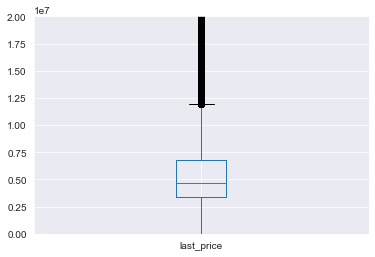

In [18]:
# Выведем основные характеристики распределения методом describe 
display ((data['last_price']).describe())

# Построим диаграмму размаха
plt.ylim(0,20000000)
data.boxplot('last_price');

Согласно графику, квартиры стоимостью более 12,5 млн. рублей являются аномалиями. Удалим их из датасета.

In [19]:
# Оставим только те квартиры, в которых стоимость ниже 12,5 млн рублей
data = data.query('last_price < 12500000')

Теперь выведем основную информацию по распределению значений в столбце с количеством комнат.

count    21836.000000
mean         1.940007
std          0.918412
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

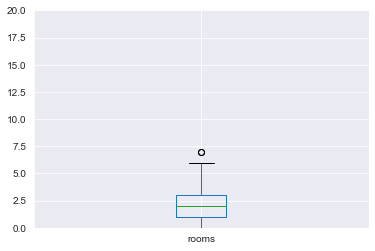

In [20]:
# Выведем основные характеристики распределения методом describe 
display (data['rooms'].describe())

# Построим диаграмму размаха
plt.ylim(0,20)
data.boxplot('rooms');

Для показателя количества комнат аномально высокое значение равно семи. Удалим из датасета позиции, в которых 7 и более комнат.

In [21]:
# Оставим только те квартиры, где количество комнат меньше 7
data = data.query('rooms < 7')

Также в глаза бросается то, что есть квартиры, в которых количество комнат равно нулю. Вероятно, такое количество комнат встречается в квартирах-студиях. Проверим эту гипотезу: посмотрим, сколько студий среди всех квартир, где количество комнат равно нулю, а также проверим, сколько квартир с нулевым количеством комнат среди всех студий.

In [22]:
# Посмотрим, сколько студий среди всех квартир, где количество комнат равно нулю
display (data.query('rooms == 0')['studio'].value_counts())

# Посмотрим, сколько квартир с нулевым количеством комнат среди всех студий
display (data.query('studio == True')['rooms'].value_counts())

True     137
False     58
Name: studio, dtype: int64

0    137
1     11
Name: rooms, dtype: int64

Гипотеза частично подтвердилась: среди квартир, где количество комнат равно нулю, студии превалируют. Среди студий почти во всех квартирах число комнат равно нулю. Проведем небольшое преобразование данных:

* Во всех квартирах, где количество комнат равно 0 заменим значение столбца `studio` на `True`
* Затем заменим значение 0 в количестве комнат на 1: так будет более корректно, так как обычно квартиры-студии обозначаются, как однкомнатные.

In [23]:
# Во всех квартирах, где количество комнат равно 0 заменим значение столбца `studio` на `True`
data.loc[data['rooms'] == 0, 'studio'] = True

# Заменим значение 0 в количестве комнат на 1
data.loc[data['rooms'] == 0, 'rooms'] = 1

Теперь посмотрим, как друг с другом согласуются общая площадь, жилая площадь и площадь кухни. По логике, общая площадь должна быть больше жилой площади или площади кухни. Проверим это.

In [24]:
# Посчтитаем количество квартир, где общая площадь больше жилой площади
display (data.query('total_area < living_area')['living_area'].count())

# Посчтитаем количество квартир, где общая площадь больше площади кухни
display (data.query('total_area < kitchen_area')['kitchen_area'].count())

27

0

В данных есть квартиры, в которых жилая площадь больше общей: вероятно, это ошибка, вызванная человеческим фактором. Попробуем это исправить: посмотрим, какую долю жилая площадь обычно занимает в общей площади. Полученный коэффициент применим к общей площади аномальных квартир, таким образом рассчитаем жилую площадь.

In [25]:
# Создадим срез не аномальных квартир, в которых жилая площадь меньше общей площади квартиры.Результат сохраним в переменной normal_area
normal_area = data.query('total_area > living_area')

# В полученном срезе найдем стандартную долю жилой площади, результат сохраним в переменной area_coef
area_coef = normal_area['living_area'].sum() / normal_area['total_area'].sum()
display (f'Доля жилой площади в стандартной квартире равна: {area_coef}')

'Доля жилой площади в стандартной квартире равна: 0.5723753779772697'

Получается, доля жилой площади составляет примерно 57%. Применим полученный коэффицент к аномальными квартирам.

In [26]:
# В строках, где жилая площадь больше общей, умножим жилую площадь на полученный коэффициент
data.loc[(data['total_area'] <= data['living_area']),'living_area'] = data.loc[(data['total_area'] <= data['living_area']),'living_area'].multiply(area_coef)

# Проверим теперь количество аномальных значений в столбце living_area
len(data.query('total_area <= living_area'))


0

Изменения внесены успешно: квартир, где жилая площадь больше общей, не осталось. Теперь проверим аномальные значения в столбце с общей площадью.

count    21834.000000
mean        53.656188
std         19.543281
min         12.000000
25%         39.000000
50%         49.900000
75%         64.000000
max        230.000000
Name: total_area, dtype: float64

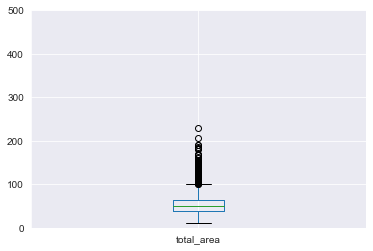

In [27]:
# Выведем основные характеристики распределения методом describe 
display (data['total_area'].describe())

# Постром диаграмму размаха
plt.ylim(0,500)
data.boxplot('total_area');

Похоже, все квартиры с площадью выше 110 кв. метров являются аномалиями. Посмотрим, сколько таких квартир.

In [28]:
data.query('total_area > 110')['total_area'].count()

290

Таких квартир всего 290, можем удалить такие квартиры из датасета

Среди квартир с площадью более 110 кв.м порядка 92% находятся в Санкт-Петербурге. Решено: оставляем такие квартиры в датасете без изменений.

In [29]:
data = data.query('total_area < 110')

Теперь изучим аномалии в столбце с высотой потолков

count    21524.000000
mean         2.697252
std          0.784805
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

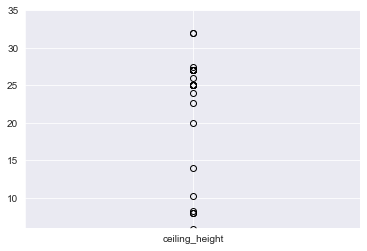

In [30]:
# Выведем основные характеристики распределения методом describe 
display (data['ceiling_height'].describe())

# Постром диаграмму размаха
plt.ylim(6,35)
data.boxplot('ceiling_height');

В датасете встречаются квартиры с аномально низкими потолками (менее двух метров) и аномально высокими потолками (более шести метров). При этом есть даже квартиры с высотой потолков более 20 метров. Кажется, что в этом случае человек ошибся на 10 метров: вместо 3.2 метров написал 32 метра, вместа 2.4 метра написал 24 метра и т.д. Обработаем данные аномалии следующим образом:

* Квартиры, в которых потолки меньше двух метров, удалим из датасета 
* Квартиры с высотой потолков от 6 до 20 метро удалим из датасета
* Квартиры с высотой потолков от 20 и более метров разделим на 10

In [31]:
# Уберем из датасета квартры с потолками ниже двух метров
data = data.loc[data['ceiling_height'] >= 2]

# Уберем из датасета квартры с высотой потолков от 6 до 20 метров
data = data.loc[(data['ceiling_height'] < 6) | (data['ceiling_height'] > 20)]

# Квартиры с высотой потолков от 20 метров разделим на 10
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data['ceiling_height'] / 10

# Выведем уникальные значения высоты потолков для проверки
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.37, 3.38, 3.39,
       3.4 , 3.42, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.54, 3.55,
       3.56, 3.57, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.7 ,
       3.75, 3.78, 3.8 , 3.83, 3.85, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  ,
       4.06, 4.1 , 4.15, 4.19, 4.2 , 4.25, 4.3 , 4.37, 4.5 , 4.7 , 5.  ,
       5.3 , 5.8 ])

Все изменения внесены успешно: в датасете не осталось квартир с высотой потолков ниже двух метров и выше шести метров. Теперь проверим, как в согласуются между собой этаж квартиры и количество этажей в доме. Посмотрим, есть ли квартиры, этаж которых выше, чем количество этажей в доме.

In [32]:
# Посмотрим, сколько в датасете квартир, этаж которых выше, чем количество этажей в доме
data.loc[data['floor'] > data['floors_total']]['floors_total'].count()

32

Таких квартир 33. Вероятно, во всех таких случаях человек имел в виду, что он живет на последнем этаже. Приравняем в таких квартирах значение столбца `floor` к значению столбца `floors_total`

In [33]:
# В тех квартирах, где значение floor больше floors_total поставим значение floor = floors_total
data.loc[data['floor'] > data['floors_total'], 'floor'] = data['floors_total']

# Проверим внесенные изменения
len(data.loc[data['floor'] > data['floors_total']])

0

В датасете не осталось квартир, где этаж квартиры выше количества этажей в доме, изменения внесены успешно. Проверим, какое количество этажей бывает в доме и на каких этажах располагаются квартиры.

In [34]:
# Выведем уникальные значения количества этажей в доме и этажей, на которых распологаются квартиры.
display (data['floors_total'].sort_values().unique())
display (data['floor'].sort_values().unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 52,
       60])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

Данные выглядят правдоподобно: в датасете отсутствуют значения меньше единицы, а максимально количество этажей в доме равно 60.
Теперь проверим столбцы с расстоянием до ближайшего объекта: аэропорта, парка, водоема.

Теперь проверим, сколько квартир осталось после предобработки данных

In [35]:
len(data)

21514

Из первоначальных 23 699 объявлений осталось 21 514. Мы удалили чуть менее 10% от изначального из изначального датафрейма.

### Добавление новых столбцов

Добавим в датасет дополнительные столбцы для анализа:

* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

In [36]:
# Добавим цену за один квадратный метр, разделив стоимость квартры на ее площадь
data['cost_per_meter'] = data['last_price'] / data['total_area']

# Добавим в данные столбцы с днем недели, месяцем и гоодом
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['year'] = data['year'].astype(int)

# Добавим расстояние до центра города в километрах, разделив расстояние в метрах на 1000,
# и округлим полученное значение до целого числа
data['city_centers_km'] = data['cityCenters_nearest'] / 1000
data['city_centers_km'] = data['city_centers_km'].round()

# Напишем функцию, которая определит тип этажа 
def floor_type(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    elif data['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

# Добавим результат функции в отдельный столбец методом .apply
data['floor_type'] = data.apply(floor_type, axis = 1)

# Проверим, добавились ли новые столбцы. Вызовем первые 5 строк датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,weekday,month,year,city_centers_km,floor_type
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.0,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,NaN,другой
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,19.0,другой


Все новые столбцы добавлены в датасет.

### Исследовательский анализ данных

#### Построение гистограмм

Для проведения исследовательского анализа данных построим гистограммы по следующим значениям:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

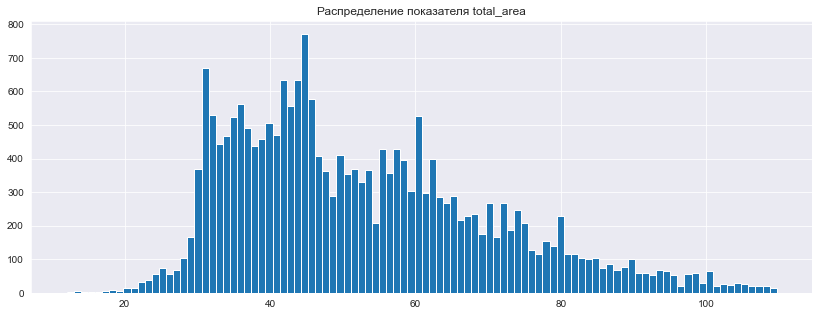

In [37]:
# Построим гистрограмму по общей площади квартиры
data['total_area'].hist(bins=100,
                       figsize=(14,5))

plt.title('Распределение показателя total_area');

Наиболее распространенные площади квартир: 30 кв.м, от 40 до 44 кв.м и 60 кв.м

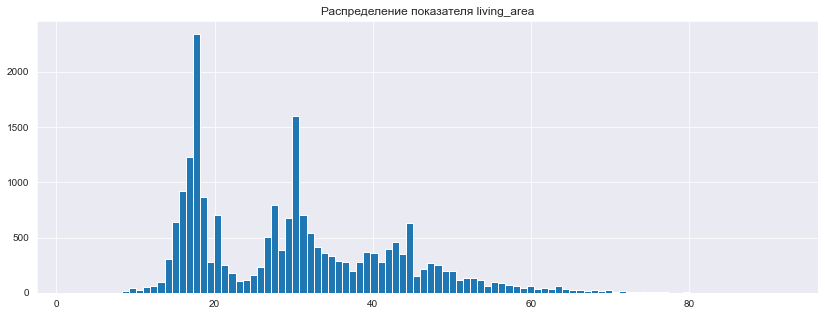

In [38]:
# Построим гистрограмму по жилой площади квартиры
data['living_area'].hist(bins=100,
                         figsize=(14,5))

plt.title('Распределение показателя living_area');

Распределение жилой площади неравномерно: есть пик в районе 18 кв.м, 30 кв.м и небольшой всплекск в районе 45 кв.м

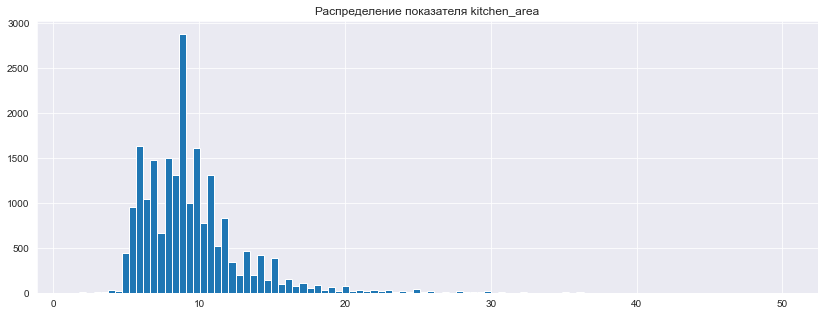

In [39]:
# Построим гистрограмму по площади кухни
data['kitchen_area'].hist(bins=100,
                          figsize=(14,5))

plt.title('Распределение показателя kitchen_area');

Наиболее распространенная площадь кухни в районе 18 кв.м.

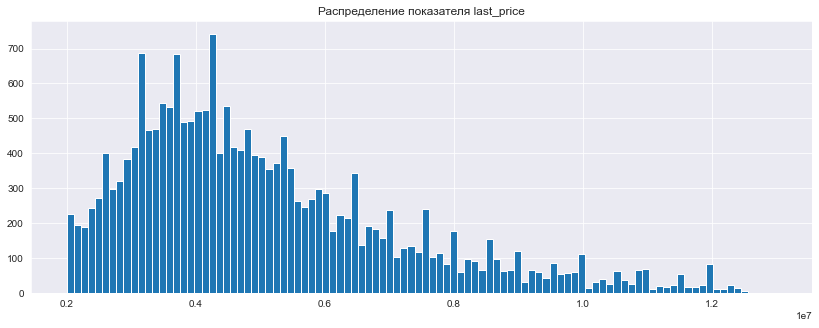

In [40]:
# Построим гистрограмму по стоимости квартиры
data['last_price'].hist(bins=100, range=(2000000,13000000),figsize=(14,5))

plt.title('Распределение показателя last_price');

Судя по гистограмме, мидианная рыночная стоимость квартиры находится в районе 4 млн. рублей.

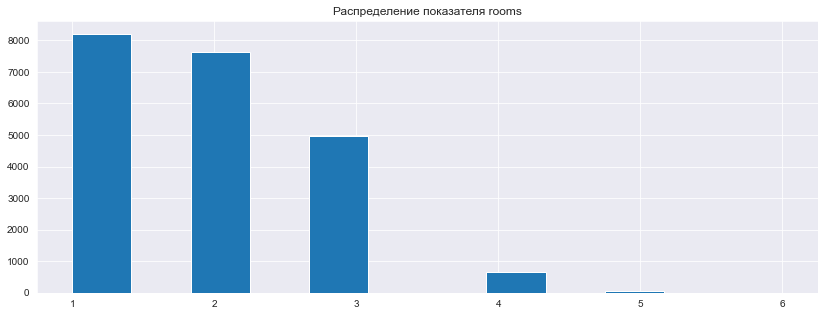

In [41]:
# Построим гистрограмму по количеству комнат
data['rooms'].hist(bins=12,figsize=(14,5))

plt.title('Распределение показателя rooms');

Распределение квартир по количеству комнат выглядит логичным: чаще всего встречаются однокомнатные и двухкомнатные квартиры (более, чем в 7 000 случаев). Трехкомнатные квартиры встречаются реже (примерно в 5 000 случаев). Совсем редки квартиры с 4 и более комнатами: таких квартир менее тысячи.

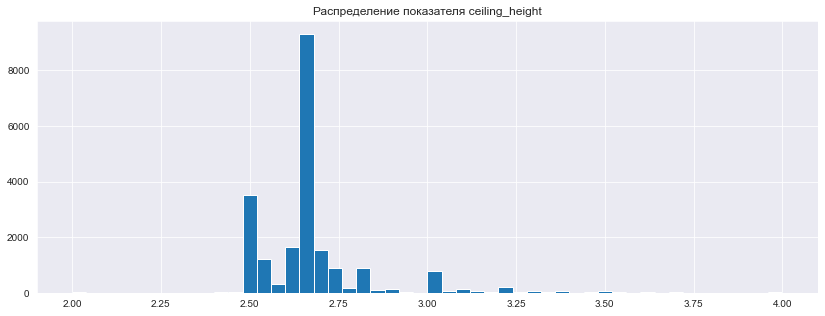

In [42]:
# Построим гистрограмму по высоте потолков
data['ceiling_height'].hist(bins=50, range=(2,4),figsize=(14,5))

plt.title('Распределение показателя ceiling_height');

 Наиболее распространенная высота потолков в Ленинградской области лежит в районе 2.6-2.7 метров. Потолки с высотой выше трех метров и ниже 2.5 метров встречаются значительно реже.

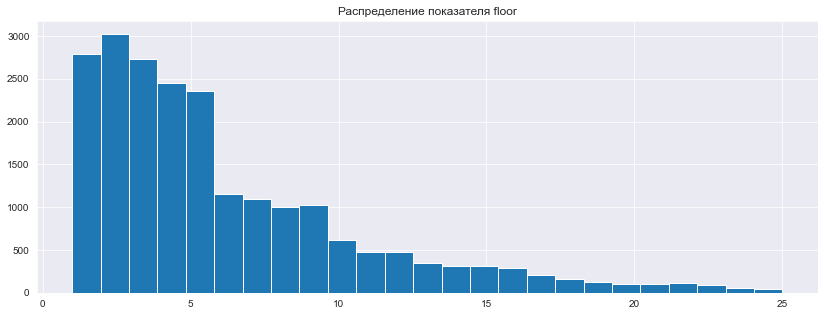

In [43]:
# Построим гистрограмму по этажу квартиры
data['floor'].hist(bins=25, range=(1,25), figsize=(14,5))

plt.title('Распределение показателя floor');

Большая часть квартир находится на 2, 3 и 4 этажах. Это кажется логичным, так как в России довольно много пятиэтажных многоквартирых домов времен советской постройки. 

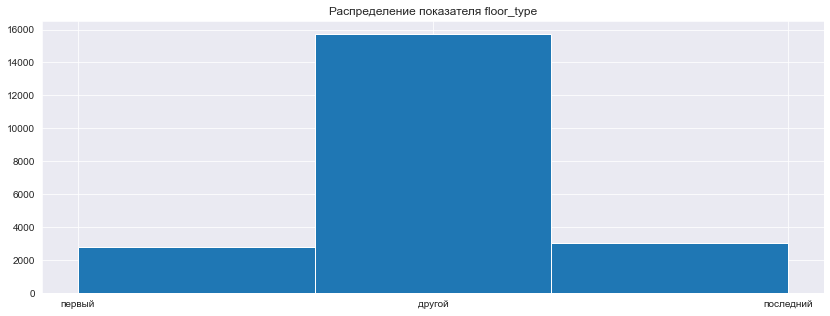

In [44]:
# Построим гистрограмму по типу этажа квартиры
data['floor_type'].hist(bins=3, figsize=(14,5))

plt.title('Распределение показателя floor_type');

Основная часть квартир находится не на первом и не на последнем этаже. С точки зрения вероятности это логично: шанс купить квартиру между первым и последним этажом выше, так как таких квартир больше.

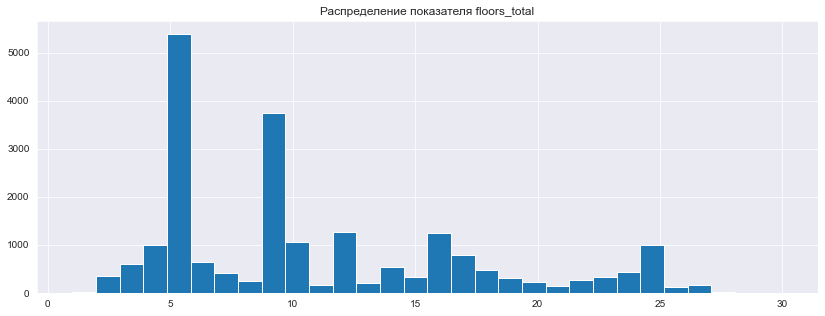

In [45]:
# Построим гистрограмму по количеству этажей в доме
data['floors_total'].hist(bins=30, range=(1,30), figsize=(14,5))

plt.title('Распределение показателя floors_total');

На гистограмме видно, что квартиры, как правило, находятся в домах с 5 или 9 этажами. Дома выше 25 этажей встрачеются крайне редко. В целом распределение этажей неравномерное: есть провалы между 5- и 9-этажными домами, а также между 13- и 16-этажными домами, что в целом согласуется с реальностью: в России много пяти- и девятиэтажных домов, а, например шести- или 14-этажные дома встречаются редко.

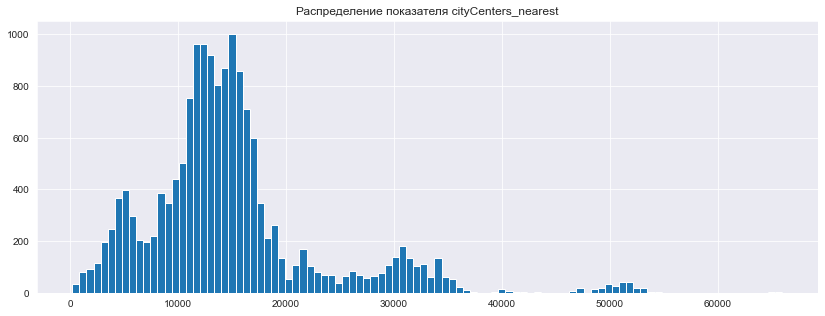

In [46]:
# Построим гистрограмму по расстоянию от квартиры до центра города
data['cityCenters_nearest'].hist(bins=100, figsize=(14,5))

plt.title('Распределение показателя cityCenters_nearest');

Большинство квартир расположено в 11-17 км. от центра города

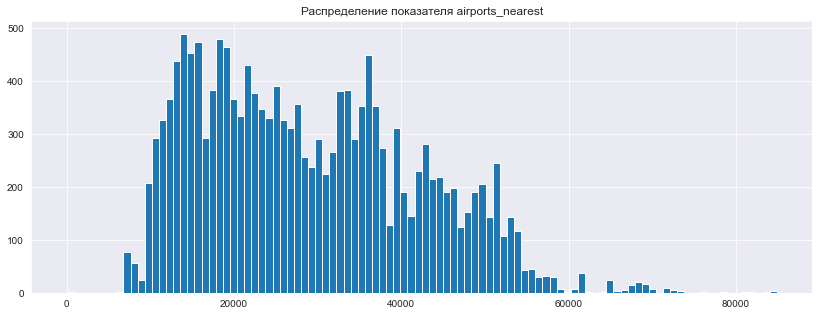

In [47]:
# Построим гистрограмму по расстоянию от квартиры до ближайшего аэропорта
data['airports_nearest'].hist(bins=100, figsize=(14,5))

plt.title('Распределение показателя airports_nearest');

Распределение расстояния от квартиры до ближайшего аэропорта неравномерное. Пики с чередованием провалов начинаются с 10 км. и заканчиваются примерно в районе 52 км.

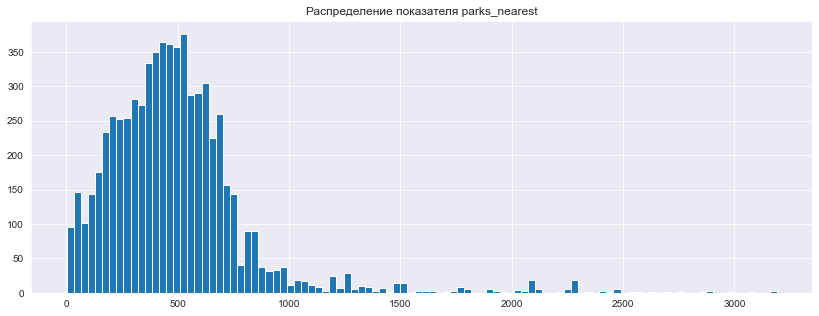

In [48]:
# Построим гистрограмму по расстоянию от квартиры до ближайшего парка
data['parks_nearest'].hist(bins=100, figsize=(14,5))

plt.title('Распределение показателя parks_nearest');

Большая часть квартир находится на расстоянии 400-600 метров от ближайшего парка.

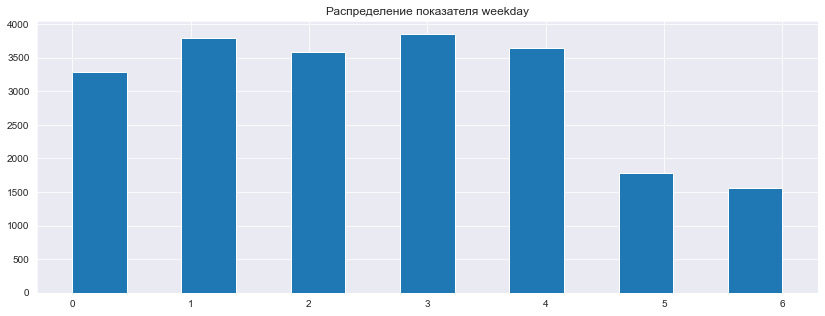

In [49]:
# Построим гистрограмму по дням недели публикации объявления 
data['weekday'].hist(bins=13, figsize=(14,5))

plt.title('Распределение показателя weekday');

В будние дни пользователи публикают объявления почти одинаково часто: реже всего в понедельник (около 3 300 объявлений было опубликовано в этот день), чаще всего в четверг (порядка 3 800 объявлений). Значительно реже объявления публикуются в субботу и воскресенье (менее 2000 объявлений).

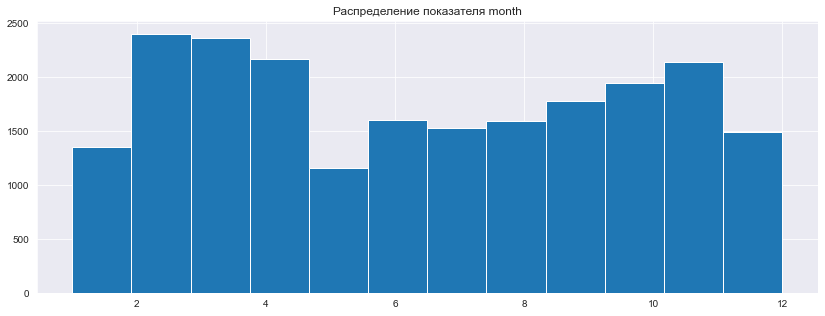

In [50]:
# Построим гистрограмму по месяцу публикации объявления 
data['month'].hist(bins=12, figsize=(14,5))

plt.title('Распределение показателя month');

Активность публикаций объявлений в январе, мае и декабре самая низкая: это, вероятно, объясняется новогодними и майскими праздниками. Больше всего объявлений публикуется в феврале, после чего актиность равномерно снижается, доходя до минимума в мае. Летом активность публикации объявлений снова начинает расти, доходя по пика в ноябре.

#### Анализ скорости продажи квартир

Для анализа скорости продажи квартиры построим гистрограмму по столбцу `days_exposition`, а также рассчитаем среднее и медианное значения.

count    18885.000000
mean       171.897379
std        209.882061
min          1.000000
25%         43.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

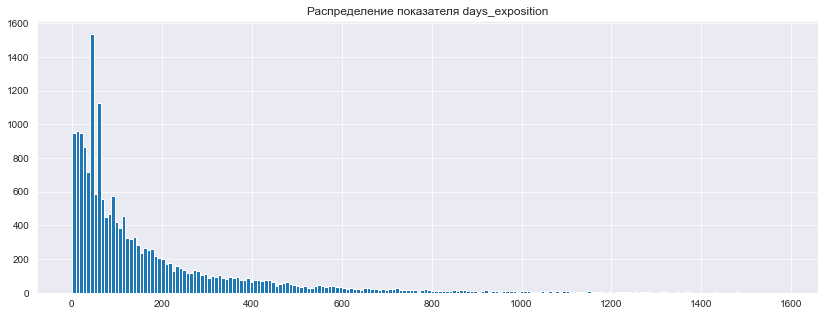

In [51]:
# Построим гистрограмму по скорости продажи квартиры в днях
data['days_exposition'].hist(bins=200, figsize=(14,5))

plt.title('Распределение показателя days_exposition');

# Рассчитаем среднее и медианное значения метдом .describe
display (data['days_exposition'].describe())

Средняя скорость продажи квартиры составляет 171 день, медианная - 91 дня. Между средним и медианным значениями очень большая разница: это может свидетельствовать о наличии выбросов. На гистрограмме видно, что распределение в целом равномерно снижается, что нормально. Но в районе 40-60 дней есть два странных пика, рассмотрим их более внимательно.

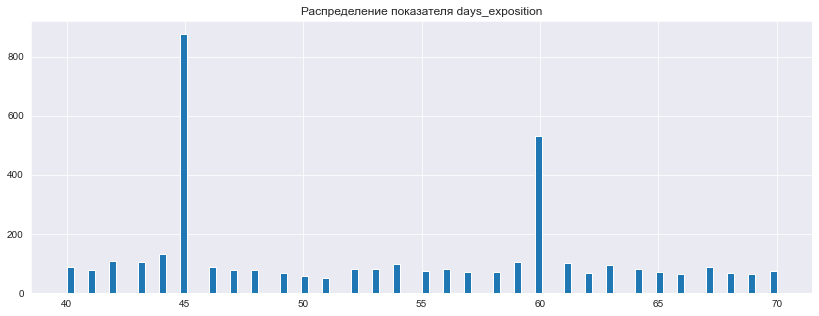

In [52]:
# Построим гистрограмму по тому диапазону, где есть пики
data['days_exposition'].hist(bins=100, range=(40,70), figsize=(14,5))

plt.title('Распределение показателя days_exposition');

Стандартное значение частоты объявлений в диапазоне от 40 до 70 дней находится в районе 50: где-то чуть ниже, где-то немного выше. Однако, из общей картины сильно выделяются квартиры, которые размещаются 45 и 60 дней: таких квартир от 340 до 410. Возможно, эти объявления связаны с действими мошенниками.

#### Изучение влияния различных факторов на стоимость квартиры 

Посмотрим на взаимосвязь стоимости квартиры и других факторов. Начнем с площади квартиры. 

0.6969002119880111

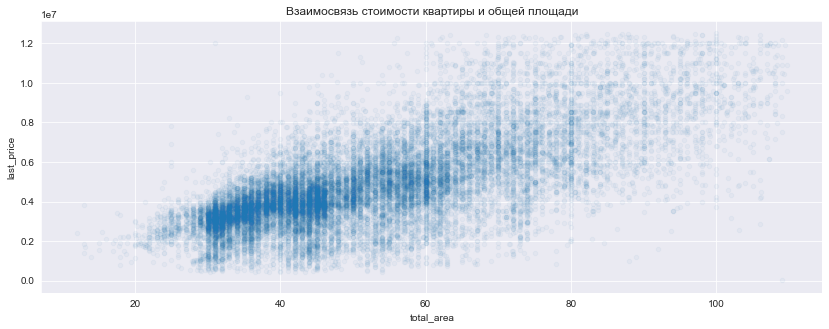

In [53]:
# Посчитаем коэффициент корреляции
display (data['last_price'].corr(data['total_area']))

# Построим диаграмму рассеяния
data.plot(x='total_area',
          y='last_price',
          kind='scatter',
          alpha=0.04,
          figsize=(14,5),
          title='Взаимосвязь стоимости квартиры и общей площади');

На диаграмме видна прямая линейная зависимость между стоимостью квартиры и ее площадью. Коэффициент корреляции больше нуля (0,7).

0.5458992942596129

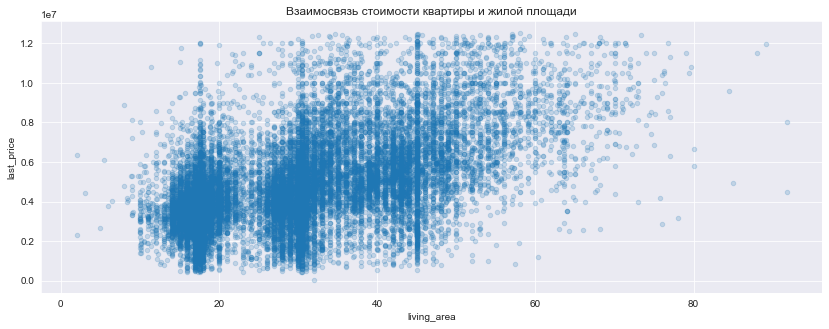

In [54]:
# Посчитаем коэффициент корреляции
display (data['last_price'].corr(data['living_area']))

# Построим диаграмму рассеяния
data.plot(x='living_area',
          y='last_price',
          kind='scatter',
          alpha=0.2,
          figsize=(14,5),
          title='Взаимосвязь стоимости квартиры и жилой площади');

Здесь также видна видна прямая линейная зависимость между стоимостью квартиры и ее жилой площадью. Коэффициент корреляции больше нуля (0,55).

0.45958099373913314

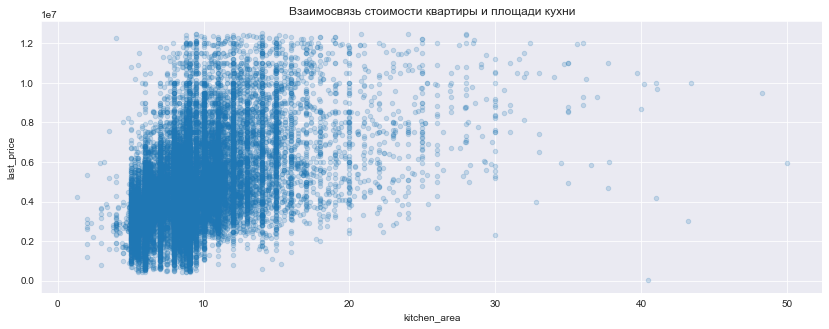

In [55]:
# Посчитаем коэффициент корреляции
display (data['last_price'].corr(data['kitchen_area']))

# Построим диаграмму рассеяния
data.plot(x='kitchen_area',
          y='last_price', 
          kind='scatter',
          alpha=0.2,
          figsize=(14,5),
          title='Взаимосвязь стоимости квартиры и площади кухни');

Логично, что если есть зависимость стоимости квартиры от общей площади, то зависимость от площади отдельных помещений тоже есть. Коэффициент корреляции между стоимостью квартиры и площадью кухни также выше нуля (0,46) - связь слабее, чем с другими показателями площадь, но она есть.

Теперь посмотрим, как количество комнат в квартире влияет на ее стоимость. Сгруппируем данные о стоимости квартиры по количеству комнат, внутри каждой группы посчитаем медианную стоимость и на основании этих данных построим график.

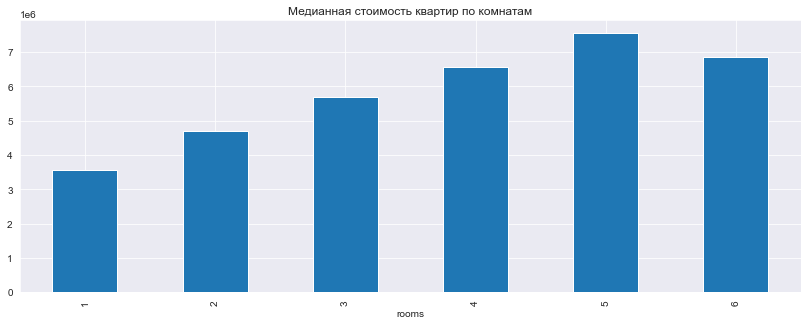

In [56]:
# Группировка стоимости по комнатам, расчет медианной стоимости и построение графика
data.groupby('rooms')['last_price'].median().plot(kind='bar',
                                                  figsize=(14,5),
                                                  title='Медианная стоимость квартир по комнатам');

На графике видна прямая взаимосвязь: чем больше комнат в квартире, тем выше ее стоимость.

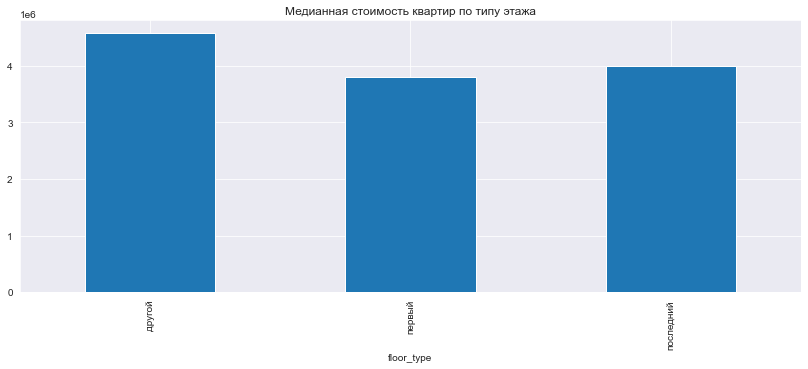

In [57]:
# Группировка стоимости по типу этажа, расчет медианной стоимости и построение графика
data.groupby('floor_type')['last_price'].median().plot(kind='bar',
                                                       figsize=(14,5),
                                                       title='Медианная стоимость квартир по типу этажа');

График показывает, что квартиры на первом этаже, как правило, дешевле, чем квартиры на последнем или ином этажах.

Посчитаем медианную стоимость по дням недели размещения объявления

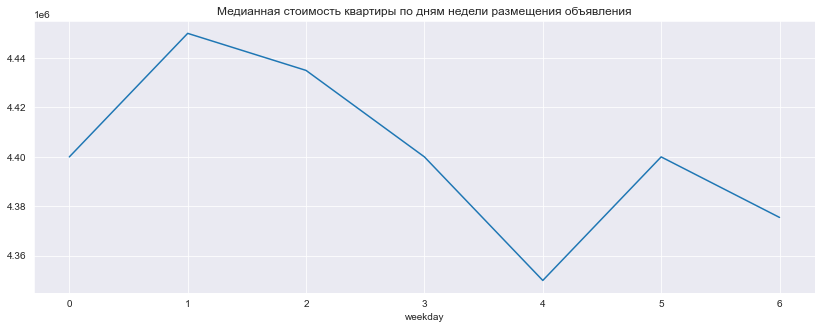

In [58]:
# Группировка стоимости по дням недели, расчет медианной стоимости и построение графика
data.groupby('weekday')['last_price'].median().plot(figsize=(14,5),
                                                    title='Медианная стоимость квартиры по дням недели размещения объявления');

Медианная стоимость квартиры существенно не меняется: если обратить внимание на масштаб графика, то становится понятно, что медианная стоимость квартиры в целом не зависит от дня недели, она колеблется незначательно 4,5 млн до 4,3 млн. 

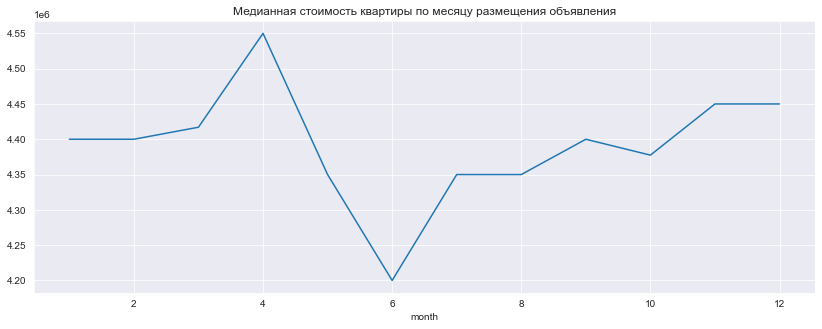

In [59]:
# Группировка стоимости по месяцам, расчет медианной стоимости и построение графика
data.groupby('month')['last_price'].median().plot(figsize=(14,5),
                                                 title='Медианная стоимость квартиры по месяцу размещения объявления');

Дороже всего квартиры стоят в марте, сентябре и декабре. Дешевле всего - в июне и октябре. Но в целом разница в стоимостях не существенная.

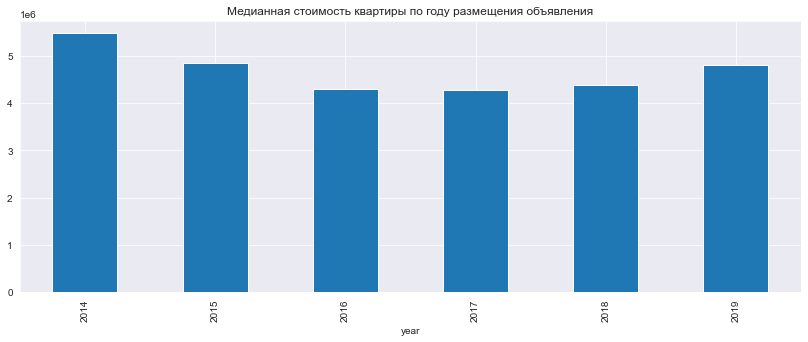

In [60]:
# Группировка стоимости по годам, расчет медианной стоимости и построение графика
data.groupby('year')['last_price'].median().plot(kind='bar',
                                                figsize=(14,5),
                                                title='Медианная стоимость квартиры по году размещения объявления');

Медианная стоимость квартиры снижалась с 2014 по 2017 год, с 2018 по 2019 год рыночная стоимость снова начала расти, почти достигнув уровня 2015 года.

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [61]:
# Создадим сводную таблицу по названию населенных пунктов. В значениях рассчитаем количество объявлений и среднюю стоимость квадратного метра
data_sorted = data.pivot_table(index='locality_name', values='cost_per_meter', aggfunc=['count', 'mean'])

# Переименуем столбцы
data_sorted.columns = ['count', 'mean']

# Отсортируем датасет по количеству объявлений 
data_sorted = data_sorted.sort_values(by='count', ascending=False)

# Выведем первые 10 значений датасета
display (data_sorted[:11])


,count,mean
locality_name,,
Санкт-Петербург,13675,106185.306805
поселок Мурино,556,85681.762601
поселок Шушары,433,78748.035800
Всеволожск,394,67222.431462
Пушкин,339,100825.579616
Колпино,335,75221.876295
поселок Парголово,325,90417.201454
Гатчина,303,68664.035870
деревня Кудрово,298,92409.726322


В Санкт-Петербурге больше всего объявлений, а также самая высокая средняя стоимость квадратного метра. На втором месте по средней стоимости квартир находится город Пушкин. 

#### Вычисление средней стоимости каждого километра в Санкт-Петербурге

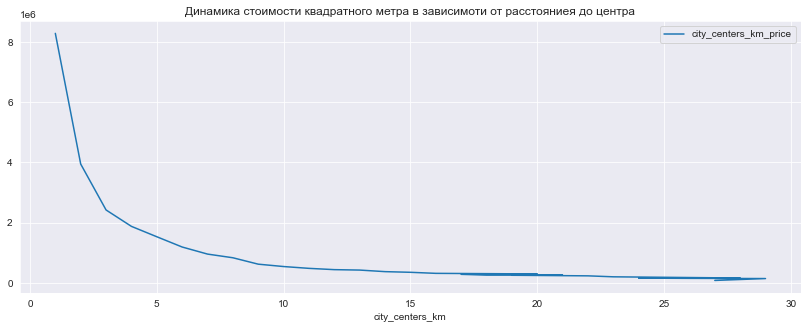

In [62]:
# Добавим столбец со стоимостью каждого километра до центра
data['city_centers_km_price'] = data['last_price'] / data['city_centers_km']

(data
    # Отфильтруем данные только по Санкт-Петербургу
    .query('locality_name == "Санкт-Петербург"') 
    # Построим сводную таблицу по километрам до центра, в значениях укажем среднюю стоимость километра до центра
    .pivot_table(index='city_centers_km', values='city_centers_km_price')
    # Отсортируем данные и построим график
    .sort_values(by='city_centers_km_price', ascending=False)
    .plot(figsize=(14,5), title='Динамика стоимости квадратного метра в зависимоти от расстояниея до центра')
);


Стоимость километра до центра резко падает в диапазоне от 1 до 4 км., затем падение замедляется на участке от 6 до 10 км. После 10 км стоимость каждого километра до центра падает, но незначительно.

### Общий вывод

В ходе исследования были проведены работы по предобработке данных: заполнение и удаление пропущенных значений, замена типов данных, удаление дубликатов, обработка аномальных значений.

**В результате исследования удалось установить:**

* Наиболее распространенные площади квартир: 30 кв.м, от 40 до 44 кв.м и 60 кв.м
* Медианная рыночная цена квартиры находится в районе 4 млн. рублей.
* Чаще всего встречаются однокомнатные и двухкомнатные квартиры (более, чем в 7 000 случаев). Трехкомнатные квартиры встречаются реже (примерно в 5 000 случаев). Совсем редки квартиры с 4 и более комнатами: таких квартир менее тысячи.
* Наиболее распространенная высота потолков в Ленинградской области лежит в районе 2.6-2.7 метров. Потолки с высотой выше трех метров и ниже 2.5 метров встречаются значительно реже.
* Большая часть квартир находится на 2, 3 и 4 этажах. Квартиры, как правило, находятся в домах с 5 или 9 этажами. 
* В будние дни пользователи публикают объявления почти одинаково часто. Значительно реже объявления публикуются в субботу и воскресенье.
* Активность публикаций объявлений в январе, мае и декабре самая низкая: это, вероятно, объясняется новогодними и майскими праздниками. 
* Медианная скорость продажи квартиры составляет 91 день.
* На стоимость квартиры влияют такие факторы, как общая площадь и площадь отдельных помещений, количество комнат и тип этажа. День недели, месяц и год также влияют на стоимость квартиры, но не существенно.
* В Ленинградской области больше всего объявлениий о размещнии квартир в Санкт-Петербурге. В этом городе также самая высокая средняя стоимость одного квадратного метра
* Стоимость каждого километра падает на участке от 1 до 10 километров. После расстояния 10 км и выше стоимость километра почти не меняется.